# Data Fundamentals (H)
John H. Williamson -- Session 2018/2019

----
<font color="red"> Read the submission instructions at the bottom of this notebook **carefully** before submitting </font> 

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**

Note that marks shown when tests pass are **provisional** and could change after grading.

In [1]:
NAME = "Stuart Reilly" ## fill these in 
STUDENT_ID = "2258082"  ## e.g. 2222222

---

## Data Fundamentals (H)
# Week 6: Optimisation I 
## Supplement: Objective functions
----
 ##### DF(H) - University of Glasgow - John Williamson - 2017

## Objective functions

There have been a number of questions about how to come up with objective functions. This is a *very* important thing to be able to do. This note provides some guidance on how to think about an objective function.


### Properties of optimisation

Every optimisation problem has two parts:
* **Parameters**, the things that can be adjusted.
* **Objective function**, which measures how good a particular set of parameters are.

An optimisation problem usually also has:
* **Constraints**, that define the feasible set of parameters.

The **objective function** is a function *of the parameters* which returns a *single scalar value*, representing how good that parameter set is. 

## Throwing a stone

For example, if I wanted to optimise how far I could throw a stone, I might be able to adjust the throwing angle. This is the *parameter* I could tweak (just one parameter, in this case). 

The objective function must be a function which depends on this parameter. I would have to *simulate* throwing the ball to work out how far it went and try and make it go further and further.

In [2]:
import numpy as np
def L(theta):
    # L *must* depend on the parameters I can adjust
    # in this case, there is only one; the throw angle
    
    # pull out the angle, convert from degrees to radians
    angle = np.radians(theta[0])
    
    # initial throw position x=0m, y=1m
    pos = np.array([0.0, 1.0])    
    
    # initial throw velocity, depends on angle
    vel = np.array([np.cos(angle), np.sin(angle)])
    
    # simulate throwing the ball, until it hits the ground
    while pos[1]>=0:
        pos += vel
        vel[1] -= 0.005 # gravity
        vel -= 0.01 * vel     # air resistance
        
    # return how far our throw went
    # remember that we want to minimise
    # our objective function, so this value
    # must get *lower* as our throw gets longer
    
    return -np.abs(pos[0])
    
    

We can now optimize this. 

In [3]:
import scipy.optimize

# use a built in optimiser to solve this
res = scipy.optimize.minimize(L, [65.0], method="nelder-mead")
print(res)

 final_simplex: (array([[30.85437012],
       [30.8544693 ]]), array([-70.14102702, -70.14095448]))
           fun: -70.14102701610933
       message: 'Optimization terminated successfully.'
          nfev: 50
           nit: 24
        status: 0
       success: True
             x: array([30.85437012])


We will get a result that throwing the ball at around 30 degrees to the horizontal will give the longest throw. Note that the answer will only be 45 degrees if there is no air resistance; something that would be annoying to work out but is trivial to optimise for. If air resistance is higher, then the throw should be more horizontal.

### Drone lab
The objective function must depend on the parameters and return a single number, which we want to make smaller. You must encapsulate what "good" is in this function.

For example, in the drone lab, you must define what it means for a flight to be good, as a function which takes in the three *controller parameters* -- these are the knobs you can adjust -- and returns a number which represents the quality of the flight. You don't know what they represent, but you can simulate the behaviour of the drone given those parameters and measure how good they turn out to be.

You have to decide what good means and be able to write it down as a Python function.

## Strone throwing visualisation
We can plot each run as the optimisation iterates:

 final_simplex: (array([[30.85437012],
       [30.8544693 ]]), array([-70.14102702, -70.14095448]))
           fun: -70.14102701610933
       message: 'Optimization terminated successfully.'
          nfev: 50
           nit: 24
        status: 0
       success: True
             x: array([30.85437012])


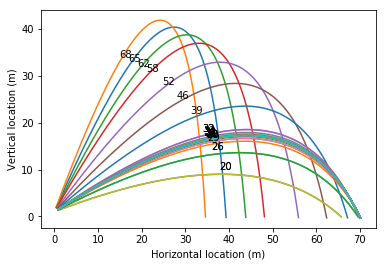

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def L(theta):
    angle = np.radians(theta[0])
    pos = np.array([0.0, 1.0])    
    vel = np.array([np.cos(angle), np.sin(angle)])
    
    posns =[]
    while pos[1]>=0:
        pos += vel
        vel[1] -= 0.005 # gravity
        vel -= 0.01 * vel     # air resistance
        posns.append(np.array(pos))
        
    posns = np.array(posns)    
    ax.plot(posns[:,0], posns[:,1])
    ax.text(posns[50,0], posns[50,1]+1, '%.0f' % theta[0])    
    return -np.abs(pos[0])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Horizontal location (m)")
ax.set_ylabel("Vertical location (m)")
import scipy.optimize
res = scipy.optimize.minimize(L, [65.0], method="nelder-mead")
print(res)

-----

# Submission instructions

### Checking your work
## Mark summary
You should check the marks you've got before submitting. To do this, 
* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and matriculation number at the top.
* SAVE THE NOTEBOOK, 
* Go to `Cell/Restart and Run All` in the menu.
* Check the output of the cell here.

Note that this is an estimated mark, and if you don't do the above procedure *carefully* you may get nonsense estimates.


In [5]:
tick.summarise_marks()

NameError: name 'tick' is not defined

### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `lab_<xxx>.ipynb`.


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Any form of plagiarism will be subject to the Plagiarism Policy. The penalties are severe.